In [1]:
import pandas as pd 
data = pd.read_csv('강원도 춘천시_관광지 및 상권 정밀 위치기반 이용자 실태 현황_20211221.csv', encoding='cp949')

In [2]:
df = data[data['읍면동'].isin(['퇴계동'])] 

In [3]:
df 

,상호명,날짜,업종,위도,경도,시도,시군구,읍면동,이용자수,남성비율,여성비율,10대비율,20대비율,30대비율,40대비율,50대이상비율,데이터기준일
8,월드중국 바디케어샵,2021-07-19,기타시설,37.861295,127.725675,강원,춘천시,퇴계동,394,50.37,49.63,1.01,1.49,1.52,1.79,94.19,2021-12-21
29,강원지방중소벤처기업청,2021-07-19,공공시설,37.847168,127.741022,강원,춘천시,퇴계동,394,29.69,70.31,0.37,0.84,1.21,1.14,96.44,2021-12-21
30,하모니헤어,2021-07-19,이미용업,37.859843,127.735887,강원,춘천시,퇴계동,26390,45.77,54.23,3.70,2.00,2.20,2.15,89.95,2021-12-21
93,맨하탄모텔,2021-07-19,숙박시설,37.863678,127.730079,강원,춘천시,퇴계동,163,60.97,39.03,7.66,21.55,28.68,27.03,15.08,2021-12-21
102,선교초대교회,2021-07-19,기타시설,37.859154,127.725594,강원,춘천시,퇴계동,98,53.34,46.66,15.33,19.09,22.32,22.18,21.08,2021-12-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
984460,진주만두,2021-11-17,음식점,37.847104,127.731704,강원,춘천시,퇴계동,87,52.71,47.29,15.04,19.09,22.76,22.13,20.98,2021-12-21
984493,오땡큐,2021-11-17,이미용업,37.859633,127.726508,강원,춘천시,퇴계동,63,57.21,42.79,14.05,18.24,22.00,25.69,20.02,2021-12-21
984556,달인각,2021-11-17,음식점,37.856755,127.721342,강원,춘천시,퇴계동,8220,37.07,62.93,5.58,0.98,2.50,1.63,89.31,2021-12-21
984606,퇴계동 1897,2021-11-17,유흥주점,37.855279,127.737805,강원,춘천시,퇴계동,506,62.18,37.82,4.47,13.36,31.23,37.56,13.38,2021-12-21


In [4]:
# 상호명별 이용자수 합계 구하기
usage_sum = df.groupby('상호명')['이용자수'].sum()

# 상호명별 등장 횟수 구하기
count_by_name = df['상호명'].value_counts()

# 이용자수 합계를 등장 횟수로 나누어 평균 구하기
average_usage = usage_sum / count_by_name

# 평균 이용자수를 데이터프레임에 추가
df['평균이용자수'] = df['상호명'].map(average_usage)

# 중복된 상호명 제거
df.drop_duplicates(subset='상호명', inplace=True)

print(df)

              상호명          날짜    업종         위도          경도  시도  시군구  읍면동  \
8      월드중국 바디케어샵  2021-07-19  기타시설  37.861295  127.725675  강원  춘천시  퇴계동   
29    강원지방중소벤처기업청  2021-07-19  공공시설  37.847168  127.741022  강원  춘천시  퇴계동   
30          하모니헤어  2021-07-19  이미용업  37.859843  127.735887  강원  춘천시  퇴계동   
93          맨하탄모텔  2021-07-19  숙박시설  37.863678  127.730079  강원  춘천시  퇴계동   
102        선교초대교회  2021-07-19  기타시설  37.859154  127.725594  강원  춘천시  퇴계동   
...           ...         ...   ...        ...         ...  ..  ...  ...   
7831     춘천인테리어필름  2021-07-19  기타시설  37.859542  127.726590  강원  춘천시  퇴계동   
7849         도담도담  2021-07-19   음식점  37.859012  127.737952  강원  춘천시  퇴계동   
7887         창성제분  2021-07-19  기타시설  37.863772  127.730877  강원  춘천시  퇴계동   
7929          윤네일  2021-07-19  기타시설  37.860993  127.734990  강원  춘천시  퇴계동   
7981       호텔 어베인  2021-07-19  숙박시설  37.868087  127.723676  강원  춘천시  퇴계동   

       이용자수   남성비율   여성비율  10대비율  20대비율  30대비율  40대비율  50대이상비율      데이터기준일  \
8       3

C:\Users\Administrator\AppData\Local\Temp\ipykernel_19080\2401372191.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['평균이용자수'] = df['상호명'].map(average_usage)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19080\2401372191.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(subset='상호명', inplace=True)


In [5]:
df

,상호명,날짜,업종,위도,경도,시도,시군구,읍면동,이용자수,남성비율,여성비율,10대비율,20대비율,30대비율,40대비율,50대이상비율,데이터기준일,평균이용자수
8,월드중국 바디케어샵,2021-07-19,기타시설,37.861295,127.725675,강원,춘천시,퇴계동,394,50.37,49.63,1.01,1.49,1.52,1.79,94.19,2021-12-21,353.918033
29,강원지방중소벤처기업청,2021-07-19,공공시설,37.847168,127.741022,강원,춘천시,퇴계동,394,29.69,70.31,0.37,0.84,1.21,1.14,96.44,2021-12-21,244.139344
30,하모니헤어,2021-07-19,이미용업,37.859843,127.735887,강원,춘천시,퇴계동,26390,45.77,54.23,3.70,2.00,2.20,2.15,89.95,2021-12-21,24697.204918
93,맨하탄모텔,2021-07-19,숙박시설,37.863678,127.730079,강원,춘천시,퇴계동,163,60.97,39.03,7.66,21.55,28.68,27.03,15.08,2021-12-21,173.795082
102,선교초대교회,2021-07-19,기타시설,37.859154,127.725594,강원,춘천시,퇴계동,98,53.34,46.66,15.33,19.09,22.32,22.18,21.08,2021-12-21,93.745902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7831,춘천인테리어필름,2021-07-19,기타시설,37.859542,127.726590,강원,춘천시,퇴계동,85,52.63,47.37,15.69,19.47,21.65,21.79,21.40,2021-12-21,88.647541
7849,도담도담,2021-07-19,음식점,37.859012,127.737952,강원,춘천시,퇴계동,79,50.74,49.26,15.70,19.66,23.76,19.29,21.59,2021-12-21,95.180328
7887,창성제분,2021-07-19,기타시설,37.863772,127.730877,강원,춘천시,퇴계동,158,49.59,50.41,15.32,19.28,23.40,20.79,21.21,2021-12-21,403.508197
7929,윤네일,2021-07-19,기타시설,37.860993,127.734990,강원,춘천시,퇴계동,158,50.18,49.82,15.71,19.67,23.78,19.24,21.60,2021-12-21,130.409836


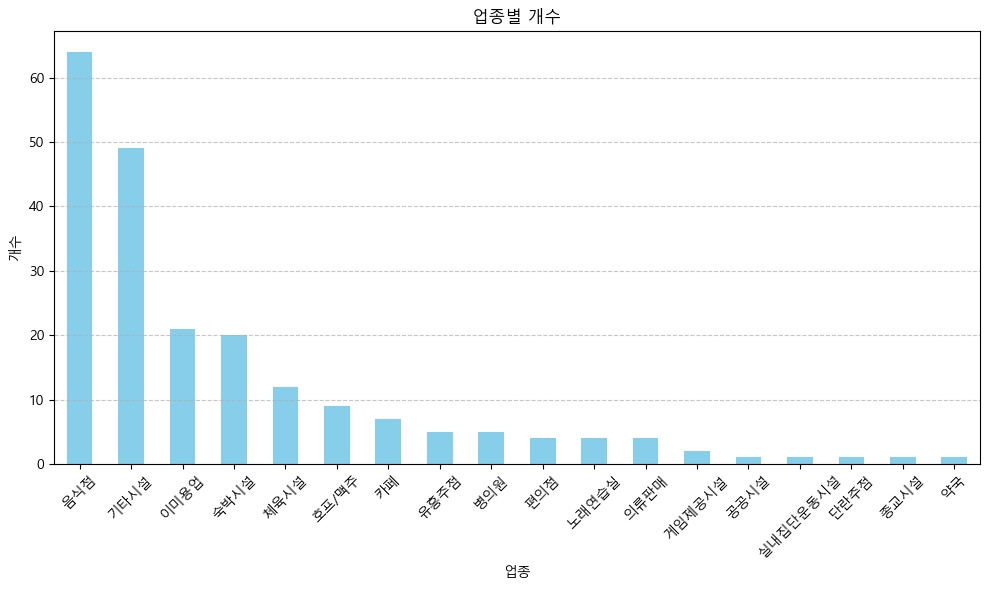

In [6]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False
import matplotlib.pyplot as plt
# 업종별 개수 집계
업종별_개수 = df['업종'].value_counts()

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
업종별_개수.plot(kind='bar', color='skyblue')
plt.title('업종별 개수')
plt.xlabel('업종')
plt.ylabel('개수')
plt.xticks(rotation=45)  # x축 라벨 회전
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

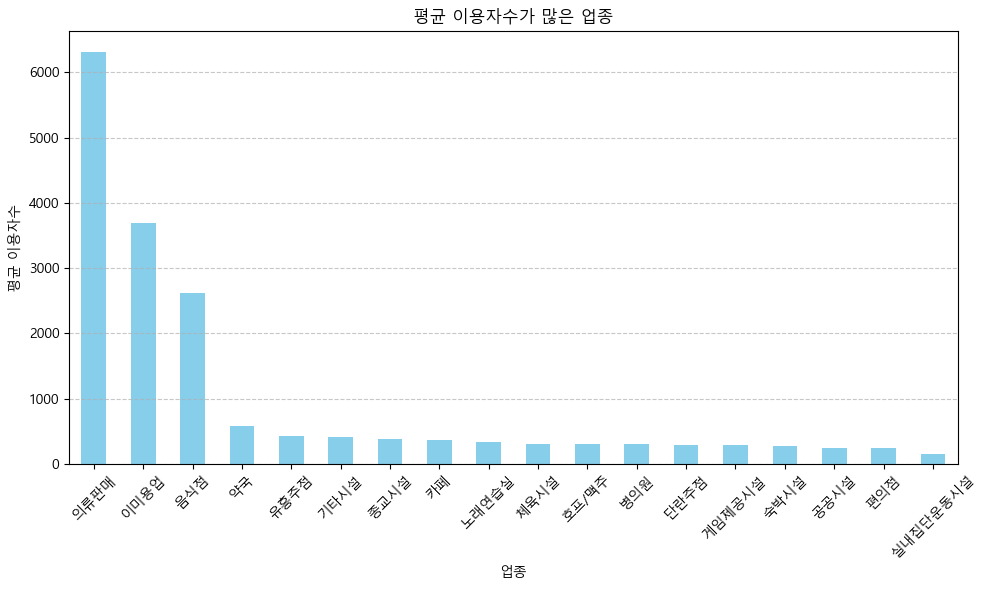

In [7]:
평균이용자수_업종별 = df.groupby('업종')['평균이용자수'].mean().sort_values(ascending=False)

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
평균이용자수_업종별.plot(kind='bar', color='skyblue')
plt.title('평균 이용자수가 많은 업종')
plt.xlabel('업종')
plt.ylabel('평균 이용자수')
plt.xticks(rotation=45)  # x축 라벨 회전
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

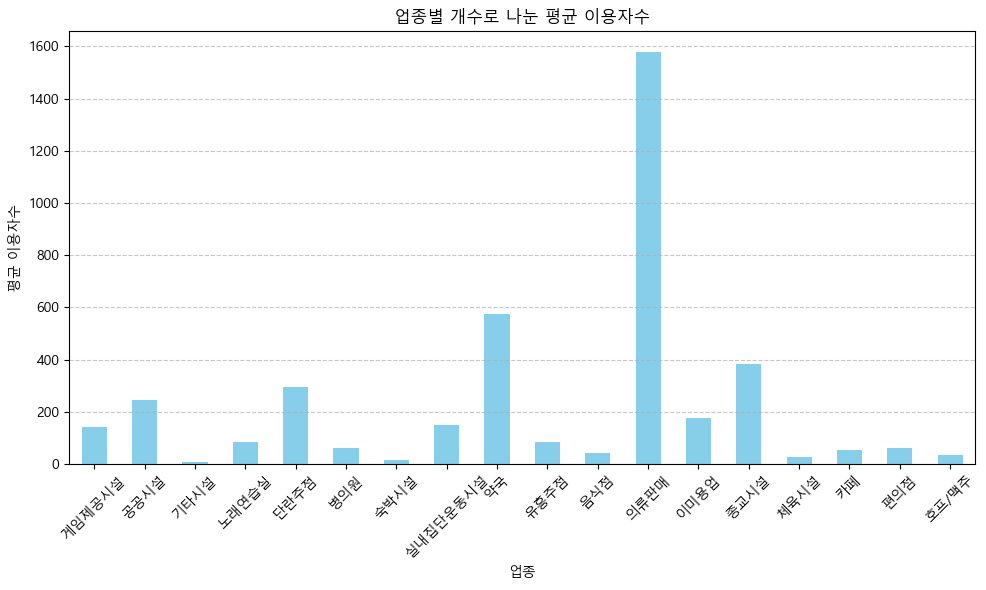

In [8]:
업종별_개수 = df['업종'].value_counts()

# 업종별 평균 이용자수 계산
평균이용자수_업종별 = df.groupby('업종')['평균이용자수'].mean()

# 업종별 개수로 이용자수를 나누기
평균이용자수_업종별_정규화 = 평균이용자수_업종별 / 업종별_개수

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
평균이용자수_업종별_정규화.plot(kind='bar', color='skyblue')
plt.title('업종별 개수로 나눈 평균 이용자수')
plt.xlabel('업종')
plt.ylabel('평균 이용자수')
plt.xticks(rotation=45)  # x축 라벨 회전
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [9]:
df_combined = df

In [10]:
import folium
from folium.plugins import MarkerCluster

# 첫 번째 데이터셋
map_center = [df['위도'].mean(), df['경도'].mean()]
mymap = folium.Map(location=map_center, zoom_start=10)

# 마커 클러스터링 추가
marker_cluster = MarkerCluster().add_to(mymap)

# 첫 번째 데이터셋의 마커 (기본 색상)
for index, row in df.iterrows():
    popup = folium.Popup(row['상호명'], parse_html=True)
    folium.Marker([row['위도'], row['경도']], popup=popup).add_to(marker_cluster)

# 지도를 표시
mymap

In [11]:
from sklearn.cluster import KMeans
import folium
from folium.plugins import MarkerCluster
# K-means 클러스터링 수행 (가중치 적용)
k = 4  # 클러스터의 수
coordinates = df_combined[['위도', '경도']]
weights = df_combined['평균이용자수']

kmeans = KMeans(n_clusters=k, random_state=0).fit(coordinates, sample_weight=weights)
df_combined['클러스터'] = kmeans.labels_

# 가중치 적용된 클러스터 중심 좌표
centers = kmeans.cluster_centers_
# Folium 지도 생성
map_center = [df_combined['위도'].mean(), df_combined['경도'].mean()]
mymap = folium.Map(location=map_center, zoom_start=14)

# 마커 클러스터링 추가
marker_cluster = MarkerCluster().add_to(mymap)

# 정류장 위치 표시 및 클러스터링
for idx, row in df_combined.iterrows():
    popup = folium.Popup(f"{row['상호명']} (합계: {row['평균이용자수']})", parse_html=True)
    folium.Marker(
        location=[row['위도'], row['경도']],
        popup=popup,
        tooltip=row['상호명'],
        icon=folium.Icon(color='blue' if row['클러스터'] == 0 else 'green' if row['클러스터'] == 1 else 'red')
    ).add_to(marker_cluster)

# 클러스터 중심 위치 표시
for center in centers:
    folium.Marker(
        location=[center[0], center[1]],
        popup="가중치 적용된 클러스터 중심",
        icon=folium.Icon(color='black', icon='info-sign')
    ).add_to(mymap)

# Jupyter Notebook 환경에서 지도 출력
mymap


C:\Users\Administrator\AppData\Local\Temp\ipykernel_19080\991248708.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined['클러스터'] = kmeans.labels_


In [12]:
from sklearn.cluster import KMeans
import folium
from folium.plugins import MarkerCluster

# K-means 클러스터링 수행 (가중치 적용)
k = 4  # 클러스터의 수
coordinates = df_combined[['위도', '경도']]
weights = df_combined['평균이용자수']

kmeans = KMeans(n_clusters=k, random_state=0).fit(coordinates, sample_weight=weights)
df_combined['클러스터'] = kmeans.labels_

# 가중치 적용된 클러스터 중심 좌표
centers = kmeans.cluster_centers_

# Folium 지도 생성
map_center = [df_combined['위도'].mean(), df_combined['경도'].mean()]
mymap = folium.Map(location=map_center, zoom_start=14)

# 마커 클러스터링 추가
marker_cluster = MarkerCluster().add_to(mymap)

# 색상을 클러스터별로 지정
cluster_colors = {1: 'green', 2: 'red', 3: 'purple'}

# 정류장 위치 표시 및 클러스터링
for idx, row in df_combined.iterrows():
    if row['클러스터'] == 0:
        continue  # 클러스터 0에 속하는 데이터 포인트를 제외
    popup = folium.Popup(f"{row['상호명']} (합계: {row['평균이용자수']})", parse_html=True)
    color = cluster_colors.get(row['클러스터'], 'gray')  # 클러스터 색상 지정
    folium.Marker(
        location=[row['위도'], row['경도']],
        popup=popup,
        tooltip=row['상호명'],
        icon=folium.Icon(color=color)
    ).add_to(marker_cluster)

# 클러스터 중심 위치 표시
for center in centers:
    folium.Marker(
        location=[center[0], center[1]],
        popup="가중치 적용된 클러스터 중심",
        icon=folium.Icon(color='black', icon='info-sign')
    ).add_to(mymap)

# Jupyter Notebook 환경에서 지도 출력
mymap


C:\Users\Administrator\AppData\Local\Temp\ipykernel_19080\1776994287.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined['클러스터'] = kmeans.labels_


In [13]:
centers_man = centers

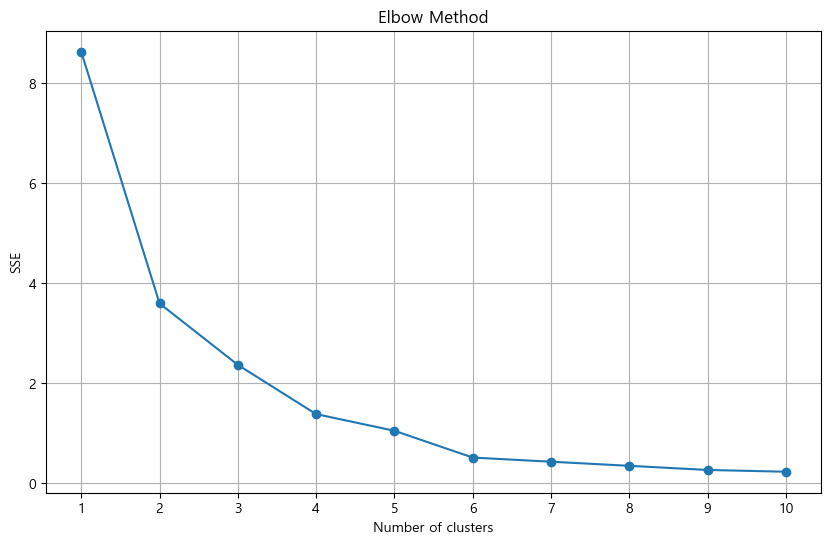

In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 클러스터 개수 후보
max_k = 10
sse = []

# K-means 클러스터링 수행 및 SSE 계산
for k in range(1, max_k + 1):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(coordinates, sample_weight=weights)
    sse.append(kmeans.inertia_)

# SSE 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_k + 1), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.xticks(range(1, max_k + 1))
plt.grid(True)
plt.show()


In [15]:
#버스 

In [16]:
import pandas as pd
df = pd.read_csv('chuncheon_villages.csv',encoding='cp949')

In [17]:
result = df[df['노선번호'].isin(['100', '100-1','101','200','200-1','300','400','1', '2','3','4','6','7','7-1','7-2','7-3','8','8-1','9','10','10-1','11','12','13','13-1','14','15','16','16-1',
                            '17','18'])]

In [18]:
df = result

In [19]:
filtered_df = df[df['주소'].str.contains('퇴계동')]

df_combined = filtered_df 

In [20]:
df_combined

,노선번호,노선(ID),정류장순서,정류장(ID),정류장명,경도,위도,데이터기준일,주소
117,2,250000200,29,250001307,한진한성,127.72324,37.85942,2024-01-02,"춘천퇴계동우체국, 131, 춘주로, 온의동, 춘천시, 강원특별자치도, 24440, ..."
119,2,250000200,31,250001326,퇴계동입구,127.72772,37.85927,2024-01-02,"퇴계동입구, 춘주로, 온의동, 춘천시, 강원특별자치도, 24445, 대한민국"
120,2,250000200,32,250001921,유승한내들,127.73104,37.86184,2024-01-02,"유승한내들, 퇴계로, 퇴계동, 춘천시, 강원특별자치도, 24377, 대한민국"
121,2,250000200,33,250026583,휴먼시아2차,127.73334,37.86050,2024-01-02,"퇴계로, 퇴계동, 춘천시, 강원특별자치도, 24377, 대한민국"
122,2,250000200,34,250001322,퇴계주공2차,127.73708,37.85843,2024-01-02,"퇴계주공2차, 퇴계로, 퇴계동, 춘천시, 강원특별자치도, 24378, 대한민국"
...,...,...,...,...,...,...,...,...,...
3389,400,250040000,24,250001309,홈플러스,127.73566,37.85083,2024-01-02,"김유정로, 퇴계동, 춘천시, 강원특별자치도, 24422, 대한민국"
3402,400,250040000,37,250026543,홈플러스,127.73516,37.85084,2024-01-02,"홈플러스, 김유정로, 퇴계동, 춘천시, 강원특별자치도, 24423, 대한민국"
3403,400,250040000,38,250001330,퇴계금호A,127.73891,37.84908,2024-01-02,"퇴계금호A, 안마산로, 퇴계동, 춘천시, 강원특별자치도, 24424, 대한민국"
3404,400,250040000,39,250001312,퇴계주공9차,127.74082,37.84770,2024-01-02,"퇴계주공9차, 안마산로, 퇴계동, 춘천시, 강원특별자치도, 24427, 대한민국"


In [21]:
df_combined = df_combined.drop_duplicates(subset=['정류장명'], keep='first')

In [22]:
df_combined

,노선번호,노선(ID),정류장순서,정류장(ID),정류장명,경도,위도,데이터기준일,주소
117,2,250000200,29,250001307,한진한성,127.72324,37.85942,2024-01-02,"춘천퇴계동우체국, 131, 춘주로, 온의동, 춘천시, 강원특별자치도, 24440, ..."
119,2,250000200,31,250001326,퇴계동입구,127.72772,37.85927,2024-01-02,"퇴계동입구, 춘주로, 온의동, 춘천시, 강원특별자치도, 24445, 대한민국"
120,2,250000200,32,250001921,유승한내들,127.73104,37.86184,2024-01-02,"유승한내들, 퇴계로, 퇴계동, 춘천시, 강원특별자치도, 24377, 대한민국"
121,2,250000200,33,250026583,휴먼시아2차,127.73334,37.86050,2024-01-02,"퇴계로, 퇴계동, 춘천시, 강원특별자치도, 24377, 대한민국"
122,2,250000200,34,250001322,퇴계주공2차,127.73708,37.85843,2024-01-02,"퇴계주공2차, 퇴계로, 퇴계동, 춘천시, 강원특별자치도, 24378, 대한민국"
128,2,250000200,40,250026846,태백교,127.75362,37.84872,2024-01-02,"영서로, 퇴계동, 동내면, 춘천시, 강원특별자치도, 24416, 대한민국"
130,2,250000200,42,250002018,현진에버빌1차,127.74756,37.85038,2024-01-02,"매쓰릴수학학원, 115, 지석로, 퇴계동, 춘천시, 강원특별자치도, 24415, 대한민국"
132,2,250000200,44,250002086,시립요양원입구,127.75003,37.85058,2024-01-02,"시립요양원입구, 영서로, 퇴계동, 동내면, 춘천시, 강원특별자치도, 24416, 대한민국"
137,2,250000200,49,250026599,석사교사거리,127.73970,37.85738,2024-01-02,"석사교사거리, 퇴계로, 퇴계동, 춘천시, 강원특별자치도, 24386, 대한민국"
138,2,250000200,50,250001323,퇴계주공1차,127.73702,37.85871,2024-01-02,"퇴계주공1차, 퇴계로, 퇴계동, 춘천시, 강원특별자치도, 24379, 대한민국"


In [23]:
import folium

# Folium 지도 생성
map_center = [df_combined['위도'].mean(), df_combined['경도'].mean()]
mymap = folium.Map(location=map_center, zoom_start=14)
# 다른 위치 정보 추가
for index, row in df_combined.iterrows():
    folium.Marker(
        location=[row['위도'], row['경도']],
        popup=row['정류장명'],
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(mymap)

# 지도 출력
mymap

In [24]:
from sklearn.cluster import KMeans
import folium

# K-means 클러스터링 수행
k = 2  # 클러스터의 수 (임의로 지정)
coordinates = df_combined[['위도', '경도']]
kmeans = KMeans(n_clusters=k, random_state=0).fit(coordinates)
centers = kmeans.cluster_centers_

# Folium 지도 생성
map_center = [df_combined['위도'].mean(), df_combined['경도'].mean()]
mymap = folium.Map(location=map_center, zoom_start=14)

# 클러스터 중심 위치 표시
for center in centers:
    folium.Marker(
        location=[center[0], center[1]],
        popup="클러스터 중심",
        icon=folium.Icon(color='black', icon='info-sign')
    ).add_to(mymap)

# 다른 위치 정보 추가
for index, row in df_combined.iterrows():
    folium.Marker(
        location=[row['위도'], row['경도']],
        popup=row['정류장명'],
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(mymap)

# 지도 출력
mymap


In [25]:
centers_man

array([[ 37.86043039, 127.72638827],
       [ 37.85980242, 127.73589975],
       [ 37.86228871, 127.73207725],
       [ 37.85073301, 127.73804454]])

In [26]:
# 클러스터링 수행
kmeans = KMeans(n_clusters=2, random_state=0).fit(centers_man)
labels = kmeans.labels_

# Folium 지도 생성
m = folium.Map(location=[37.87, 127.74], zoom_start=14)

# 클러스터 중심을 지도에 추가
for i, center in enumerate(centers):
    folium.Marker(location=center, popup=f'Center {i+1}', icon=folium.Icon(color='red')).add_to(m)

# 클러스터링된 지점들을 지도에 추가
colors = ['blue', 'green']
for i, (location, label) in enumerate(zip(centers_man, labels)):
    folium.Marker(location=location, popup=f'Man {i+1}', icon=folium.Icon(color=colors[label])).add_to(m)

m

In [27]:
centers

array([[ 37.85135824, 127.74191765],
       [ 37.860037  , 127.73155   ]])

In [31]:
# KMeans 클러스터링 수행
kmeans = KMeans(n_clusters=2, random_state=0).fit(centers_man)
labels = kmeans.labels_

# Folium 지도 생성
map_center = [centers_man[:, 0].mean(), centers_man[:, 1].mean()]
mymap = folium.Map(location=map_center, zoom_start=14)

# 클러스터 중심을 지도에 추가
for i, center in enumerate(centers):
    folium.CircleMarker(
        location=center,
        radius=30,
        color='orange',
        fill=True,
        fill_color='orange',
        popup=f'클러스터 중심 {i+1}'
    ).add_to(mymap)

# 클러스터링된 지점들을 지도에 추가
colors = ['blue', 'green']
for i, (location, label) in enumerate(zip(centers_man, labels)):
    folium.CircleMarker(
        location=location,
        radius=5,
        color=colors[label],
        fill=True,
        fill_color=colors[label],
        popup=f'지점 {i+1}'
    ).add_to(mymap)

# 지도 출력 (주피터 노트북이나 IPython 환경에서)
mymap

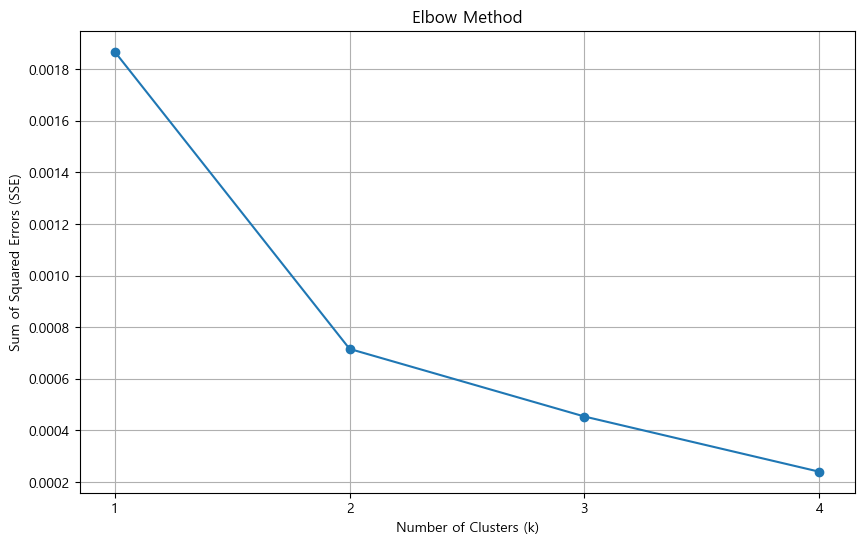

In [29]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# SSE(Sum of Squared Errors)를 계산하는 함수
def calculate_sse(data, k_range):
    sse = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
        sse.append(kmeans.inertia_)
    return sse

# K의 범위 설정
k_range = range(1, 5)  # 1부터 4까지의 클러스터 개수를 시도
  # 1부터 10까지의 클러스터 개수를 시도

# SSE 계산
sse = calculate_sse(coordinates, k_range)

# Elbow Method 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o', linestyle='-')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks(k_range)
plt.grid(True)
plt.show()